![](img/logo.288981a8dfa8.png)

# Perception in Visualization with Python
## Steve Elston
## Presented at PyData Seattle, November 4, 2019  

In this lesson we will investigate techniques to maximize the information viewers perceive from data visualizations. Creating visualization with techniques that account for human perception can highlight important insights. When faced with trying to understand complex datasets the limits of human perception become a significant factor. To better explore such complex data you can apply the results of the considerable research available on human perceptions for data visualization.    

We will use several Python packages to create the  visualizations, [matplotlib](https://matplotlib.org/), [Pandas plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html), and [seaborn](https://seaborn.pydata.org/). The code examples in this notebook use each of these packages. 

For these lessons we will be working with a data set containing the prices and characteristics of a number of automobiles. The ultimate goal is to understand the relationship between the price of a car and its characteristics. 

## Outline

These lessons are divided into three parts. In each part we will explore one aspect of using Python visualization tools to effectively understand the relationships in complex datasets. Primarily, we will work with plot aesthetics used to highlight relationships for complex datasets. By plot aesthetics we mean properties of a visualization which highlight aspects of the data relationships.  

1. **Easy to perceive plot aesthetics:** We will start by applying some aesthetics which generally are easy for people to perceive. Using these aesthetics can enhance viewers' understanding of key relationships in complex datasets.   
  - Marker position,
  - Bar length,
  - Aspect ratio,
  - Sequential and divergent color palettes,   
  - Maker size.   
    
2. **Aesthetics with limited perceptive power:** We will review some commonly used aesthetics which are often used, but which may not be the best choices for human perception. Used with care, these aesthetics can still be useful in highlighting relationships in complex datasets.   
  - Qualitative color palettes,
  - Line type,
  - Marker shape.
     
3. **Plotting with multiple views:** Understanding complex datasets can require multiple views, sometimes even for the same relationship. These views can be as simple as a comparison plots or as plots which slice complex datasets into understandable projections.    
  - Comparing side by side plots of subsets of a complex data,
  - Pairwise scatter plots for visualization of pairwise combinations of the variables, 
  - Faceted, conditioned or small multiple plots are all names for a method which produces visual slices through complex data.   



## About this Jupyter Notebook
This notebook contains material to help you learn how to maximize human perception when visualizing data. This notebook and the data set can be downloaded from GitHub:

**https://github.com/StephenElston/ExploringDataWithPython**  

The material are in the **/PerceptionAndVisualization** directory. 

This notebook was constructed using the Anconda 3.7 Python distribution. If you are not running version Anaconda 3.5 or higher, we suggest you update your Anaconda distribution now.  You can download the Python 3 Anaconda distribution for your operating system from the [Continum Analytics web site](https://www.continuum.io/downloads)

To run this notebook you need to install the Seaborn graphics packages. If you have not done so, you will need to install Seaborn as it is not in the Anaconda distribution as of now. From a command prompt on your computer type the following command. If no errors occur, you will have installed Seaborn.

``pip install seaborn``

or

``conda install seaborn``

More information on installing seaborn can be seen on the [Installing and getting started](http://seaborn.pydata.org/installing.html) page.




## About Me

These lessons have been prepared by:

**Steve Elston**

- Co-founder and principle consultant Quantia Analytics, LLC 
- Instructor, University of Washington and Harvard University Extension School.
- Creator and maintainer of four edX data science and ML/AI courses
- Decades of experience in predictive analytics and machine learning 
- Experience in several industries: payment, telecom, capital markets, logistics, energy
- PhD, MS in Geophysics from Princeton University



## About the data sets

The automotive dataset is from the [Univeristy of California Irving Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Automobile)  The data was compiled by Jeffrey C. Schlimmer from the following sources:

- 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 
- Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 
- Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

The raw sunspot dataset come from the [SISLO World Data Center](http://www.sidc.be/silso/home). The time series used here is from [R datasets package](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/sunspot.month.html)

## Why visualization and Exploratory Data Analysis?

Visualization is an essential method in any data scientist’s toolbox. Visualization is a key first step in the exploration of most data sets. These process exploring data visually and with simple summary statistics is known as Exploratory Data Analysis (EDA).    

As a general rule, you should never start creating analytical or machine learning models until you have examined the data and understand the relationships. Otherwise, you risk wasting your time creating models blindly. 

Visualization is also a powerful tool for presentation of results and for determining sources of problems with analytics. 

The concepts of exploring and analyzing a data set visually was pioneered by John Tukey in the 1960s and 1970s. Tukey consolidated his many ideas on data exploration into a book in the late 1970s, *John Tukey, Exploratory Data Analysis, 1977, Addison-Westley*.

<img src="img/Tukey.jpg" alt="Drawing" style="width:150px; height:200px"/>


Bill Cleveland documented his seminal work in visualization of complex data sets in his book, *William S. Cleveland, Visualizing Data, 1993, Hobart Press*.

<img src="img/Cleveland.jpg" alt="Drawing" style="width:150px; height:200px"/>


Edward Tufte is well know for his different take on data exploration and visualizaion. His first book outlined many of his key ideas: *Edward Tufte, Envisioning Information, Graphics Press, 1990*. His more famous book first appeared in 1993, and is still widely available: *Edward Tufte, Envisioning Information, 2nd Edition, Graphics Press, 2001*.

<img src="img/Tufte.jpg" alt="Drawing" style="width:150px; height:200px"/>

The key concept of exploratory data analysis (EDA) or visual exploration of data is to understand the relationships in the data set. Specifically, using visualization when you approach a new data set you can:

- Explore complex data sets, using visualization to develop understanding of the inherent relationships.
- Use different chart types to create multiple views of data to highlight different aspects of the inherent relationships.
- Use plot aesthetics to project multiple dimensions. 
- Apply conditioning or faceting methods to project multiple dimensions


## Resources

In this tutorial we will work with two powerful Python packages, Pandas and Seaborn. Both packages have extensive online documentation. There is an extensive tutorial on [**Visualizaton with Pandas**](http://pandas.pydata.org/pandas-docs/version/0.18.0/visualization.html).  The [**Seaborn tutorial**](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html) contains many examples of data visualization. The matplotlib web site has additional [**resources for learning to use this package**](http://matplotlib.org/resources/index.html).

## Load the data set

Let's get started. The function shown in the cell below loads the data from the .csv file. Some minimal clean up is performed on the data. Rows with missing values are dropped and some columns are converted from strings containing numbers to numeric data. 

Execute the code in this cell to load the packages you will need for this notebook.

***
**Note:** The IPyhon magic command `%matplotlib inline` enables the display of graphics inline with the Python code. If you do not include this command your graphs will not be displayed. 
***

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import log, sqrt, sin
import matplotlib.pyplot as plt
%matplotlib inline 

Execute the code in this cell to load the data into your notebook and do some cleanup of the data. **Make sure you have the .csv file in your working directory!**

In [12]:
def read_auto_data(fileName = "/Users/guywinfield/PycharmProjects/Data/Automobile price data.csv"):
    'Function to load the auto price data set from a .csv file' 

    ## Read the .csv file with the pandas read_csv method
    auto_prices = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
        
    return auto_prices
auto_prices = read_auto_data()

The code in the cell below first gives the columns Python-friendly names. Then using the Pandas ``head`` method a sample of the data is displayed. Execute this code and examine the result. 

In [13]:
## Give columns Python-friendly names
auto_prices.columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price']

## Look at the head of the dataframe
auto_prices.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [14]:
auto_prices.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


## Easy to Perceive Plot Aesthetics

In this section we will explore some plot aesthetics and attributes which maximizes human perception. By employing these aesthetics or plot attributes you can create visualizations that are more likely to highlight key relationships of your dataset.  

### Marker Position and Scatter Plots

Human perception of even small differences in position is quite acute. This acute perceptual difference makes scatter plots and other plots using position quite effective. Thus, scatter plots are one of the most useful and powerful of plot types. This despite the apparent simplicity. 

Scatter plots show the relationship between two variables in the form of dots on the plot. In simple terms, the values along a horizontal axis are plotted against a vertical axis. The scatter plot is a display of value vs. positions. 

Execute the code in the cell below to create a scatter plot of city mpg vs. curb weight. 

Text(0, 0.5, 'Vehicle Weight')

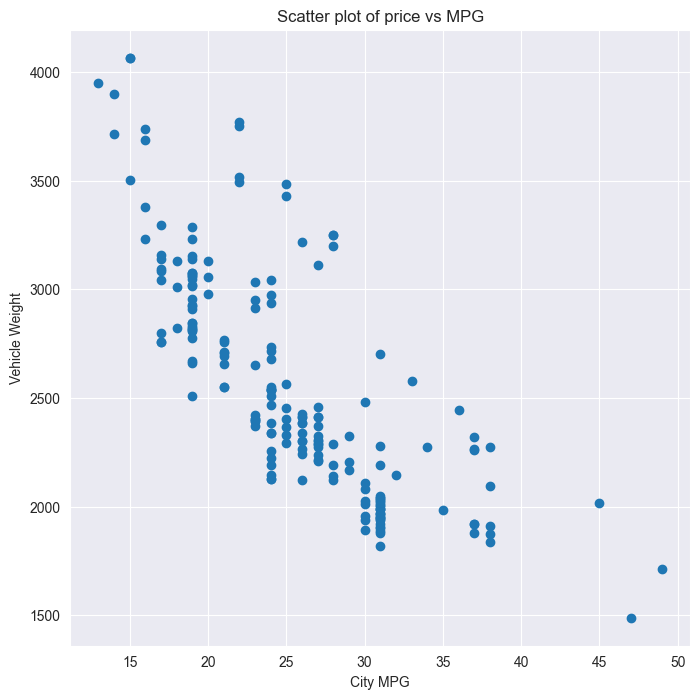

In [15]:
## Define a figure and axes and make a scatter plot
fig = plt.figure(figsize=(8, 8)) # define plot area
ax = fig.gca() # define axis                   
ax.scatter(x = auto_prices.city_mpg, y = auto_prices.curb_weight)
ax.set_title('Scatter plot of price vs MPG') # Give the plot a main title
ax.set_xlabel('City MPG') # Set text for the x axis
ax.set_ylabel('Vehicle Weight')# Set text for y axis

In this plot you can see very small differences in the vehicle weight, for each value of city MPG. These values are quite small, in some cases, yet you can easily see the differences. Notice that city MPG is quantized in 1 MPG units. 


>**Your turn:** In the cell below create and execute code to plot auto price vs City MPG.

### Bar Length and Bar plots

Length is another plot aesthetic or attribute for which human perception is quite sensitive. Most people can discern small differences in length. This makes plots using length relationship quite good at highlighting data relationships.  

Bar plots are used to display the counts of unique values of a categorical variable. The length of the bar represents the count for each unique category of the variable. Small differences in the counts, resulting in small differences in the bar lengths are quite perceptible.    

As a first step, we need the counts of the categorical variables. Pandas has a ``value_counts`` method used in the code below to create a new data frame containing the counts by ``make`` of the car. Execute this code.  

In [16]:
counts = auto_prices['make'].value_counts() # find the counts for each unique category
counts

make
toyota           32
nissan           18
honda            13
mazda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: count, dtype: int64

You can see the ordered list of counts by make above. Notice that this data frame has many fewer rows than the original, since it only needs one row for each unique value of the make. 

Now, create the bar plot of number of autos by make using the ``counts`` data frame, by executing the code in the cell below. Notice, that the recipe for this chart is the same as we have used for scatter plots and line plots, just using the ``.plot.bar`` method. 

Text(0, 0.5, 'Number of autos')

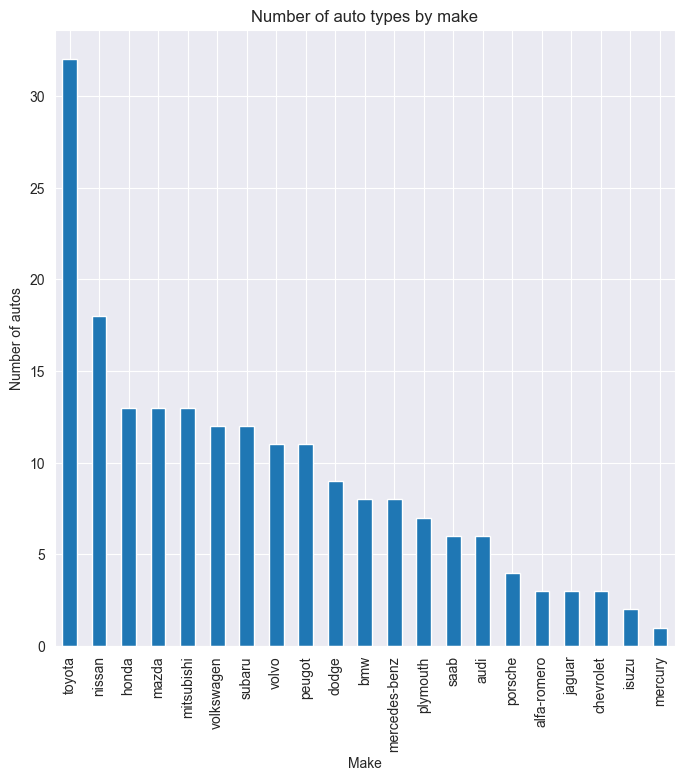

In [17]:
fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis    
counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of auto types by make') # Give the plot a main title
ax.set_xlabel('Make') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

Examine this plot. You can easily see that several car makers have the same number of models, and that the difference in number of models can be as small as 1. 

>**Note:** The counts for the above bar chart are ordered (sorted). To maximize human perception, it is important to sort counts for bar charts in either ascending or descending order. 

It is worth considering commonly used alternatives to a simple bar plot a stacked bar plot and pie charts:
- **Stacked bar charts:** When categories are stacked into single bar, the viewer often has difficulty determining the length of the sub-segments in the bars. Except in certain cases, the alignment of the sub-segments will be somewhat random and hard to compare.      
- **Pie charts:** Pie charts use area or angle, rather than length to show relative values. Human perception of area and angle is quite poor in general. Further, when there are more than a few categories the small differences in the area of the slices become completely unnoticeable.      

>**Your turn:** Make a pie chart of the number of autos by make. Notice the difficulty in clearly interpreting this chart.

### Sequential and Divergent Color Palettes

Use of **color** as an aesthetic in visualization is a complicated subject. While color is often used, it is also often abused and leads to misleading or uninterpretable results. 

To structure our discussion, we will define two particular cases for the use of color in visualization:
- A **qualitative palette** is a palette of individual colors is used to display categorical values. We will address this case latter. 
- A **sequential and divergent palettes** is a sequence of colors used to display a quantitative variable. A sequential palette contains a color sequence of changing hue, which corresponds to values of a quantitative variable. A divergent palette has two sequences of hues with a gap in the center. Divergent palettes are useful for quantitative variables with positive and negative values.  

When doing data visualization in Python you have the choice of several sets of high quality sequential and divergent color palettes. [There is an extensive set of palette choices with Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html). Matplotlib contains a [another set of high quality palettes](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html). These Matplotlib options, including **perceptually uniform palettes**, are expertly designed to optimize human perception. 

The code in the cell below creates a scatter plot with vehicle price shown using the magma palette from Matplotlib. Magma uses lighter or 'hotter' colors to show larger values of a quantitative variable. Execute this code and examine the results. 

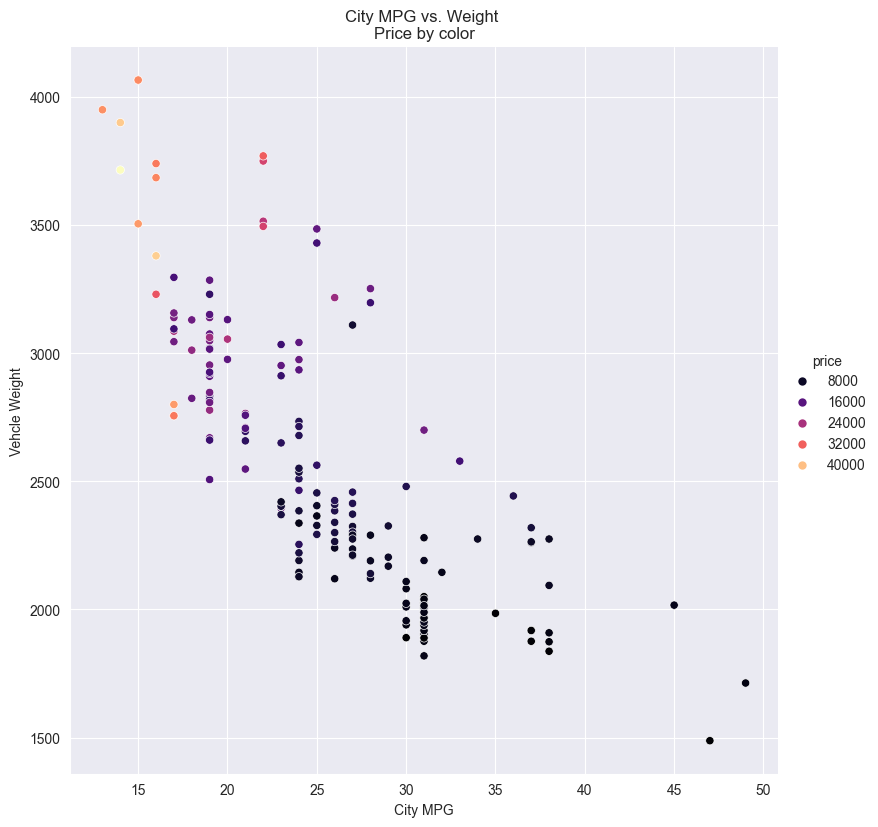

In [18]:
ax = sns.relplot(x = 'city_mpg', y = 'curb_weight', 
                 hue = 'price', palette = 'magma',
                 data=auto_prices,
                 height = 8, aspect=1/1)
ax.set(title ='City MPG vs. Weight \nPrice by color', # Give the plot a main title
       xlabel = 'City MPG', # Set text for the x axis
       ylabel = 'Vehcle Weight') # Set text for y axis   

Examine the plot, noticing the general trend from the lower right to the upper left. The lowest weight, highest mileage, autos generally have the lowest price. The highest weight, lowest mileage, cars generally have the highest prices. Within these general trends there are some deviations, but the general trend is clear from the color progression of the palette. 

While it is hard to draw quantitative conclusions from color progressions, they can help show general trends. This can be done effectively with the correct choice of palette. Best choice of palette to highlight a relationship can take some experimentation.   

### Marker Size

Another aesthetic which is useful for quantitative variables is **marker size**. As with a well chosen color palette, used properly marker size can highlight important trends in complex datasets. 

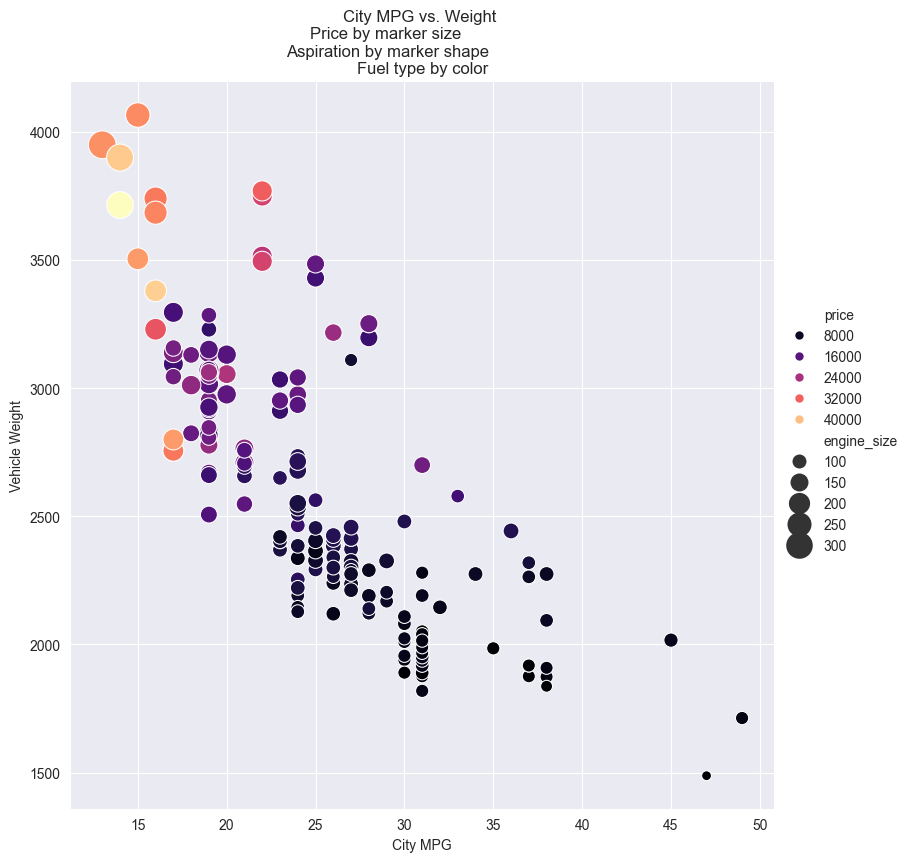

In [19]:
ax = sns.relplot(x = 'city_mpg', y = 'curb_weight', 
                 hue = 'price', palette = 'magma',
                 size = 'engine_size', sizes = (50.0, 400.0),
                 data=auto_prices,
                 height = 8, aspect=1/1)
ax.set(title ='City MPG vs. Weight \nPrice by marker size \
               \nAspiration by marker shape\
               \nFuel type by color', # Give the plot a main title
       xlabel = 'City MPG', # Set text for the x axis
       ylabel = 'Vehicle Weight') # Set text for y axis    

Notice that the engine size generally increases with vehicle weight. 

### Aspect Ratio

Changing the aspect ratio has a significant influence on how a viewer perceives a chart. The correct aspect ratio can help highlight important relationships in complex datasets. Conversely, poorly chosen or exaggerated aspect ratios can greatly distort human perception of the data relationship displayed.  

We represent aspect ratio as follows:     

$$aspect\ ratio = \frac{width}{height}\ : 1$$

Let's look at an example of how aspect ratio can change our perception of a dataset. Execute the code in the cell below to load the sunspot data set and examining the head and tail of the data frame. **Make sure you have the .csv file in your working directory!**

In [23]:
sunspots = pd.read_csv('/Users/guywinfield/PycharmProjects/Data/sunspots.csv')
sunspots.loc[:, 'date'] = pd.to_datetime(sunspots.loc[:, 'date'])
sunspots.set_index('date', inplace = True)
print(sunspots.head())
print(sunspots.tail())

            spots
date             
1749-01-01   58.0
1749-02-01   62.6
1749-03-01   70.0
1749-04-01   55.7
1749-05-01   85.0
            spots
date             
2013-05-01   78.7
2013-06-01   52.5
2013-07-01   57.0
2013-08-01   66.0
2013-09-01   37.0


/var/folders/kn/24kjgmss2yzfjngp_zf6x8vr0000gn/T/ipykernel_11155/3361518031.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sunspots.loc[:, 'date'] = pd.to_datetime(sunspots.loc[:, 'date'])
/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


The sunspot data represents an extraordinarily long time series, of over 260 years. 

Execute the code in the cell below to make a time series (line) plot of these data with an aspect ratio of 1.33:1. 

Text(0.5, 1.0, 'Time series of sunspots')

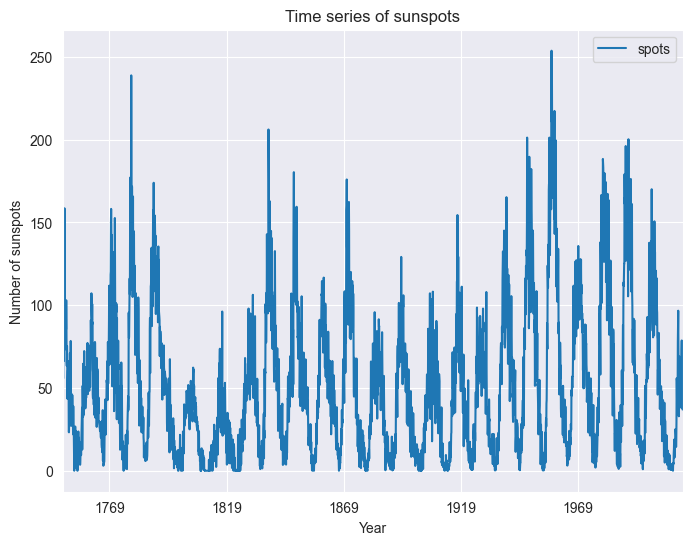

In [24]:
ax = plt.figure(figsize=(8, 6)).gca() # define axis
sunspots.plot(ax = ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of sunspots')
ax.set_title('Time series of sunspots')

There are two points to notice about the time series displayed here:
1. The number of sunspots is periodic in time. This is the well-known *sunspot cycle*.
2. Given this aspect ratio, each cycle appears to be symmetric. 

But, what happens if we change the aspect ratio to 4:1. To find out, execute the code in the cell below.

Text(0.5, 1.0, 'Time series of sunspots')

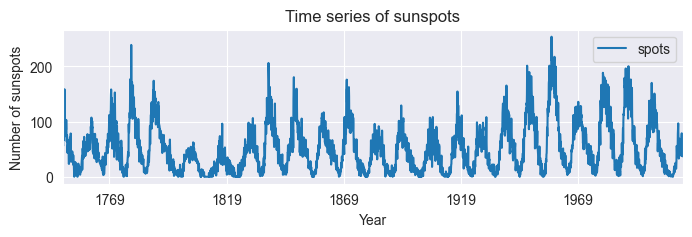

In [25]:
ax = plt.figure(figsize=(8, 2)).gca() # define axis
sunspots.plot(ax = ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of sunspots')
ax.set_title('Time series of sunspots')

With the higher aspect ratio the plot looks rather different. You can now see that each cycle has a fast rise in the rate of sunspots generally followed by a slower fall or decay. This relationship was hard to perceive with the plot using lower aspect ratio.

>**Your turn:** Try making scatter plots of vehicle weight vs. City MPG with an aspect ratio of 1:2 and 2:1. Notice how these changes affect your perception of the relationship between these variables.

## Aesthetics with Limited Perceptive Power

We have explored some aesthetics with which are easy to perceive, and therefore quite powerful. You may be surprised to learn that some commonly used plot aesthetics are not that easy to perceive, and may not add the insight the visualization creator thinks they might. 

### Line Plots and Line Type

Line plots are similar to point plots. In line plots the discrete points are connected by lines. It is common practice to use different pattern types to differentiate between lines on a graph. While this approach can be effective, it is only useful for a limited number of lines on one graph. The use of too many similar line pattern on one plot leads to viewer confusion and poor perception of the data relationships. In summary, line pattern can be effective, but only when used sparingly.  

The code in the cell below creates a dataframe using various transformations of the sunspot data. Execute the code and examine the resulting dataframe. 

In [26]:
sunspot_mean = sunspots.mean()[0]
y1 = [z/sunspot_mean for z in sunspots.spots]
y2 = [log(z + 0.01) for z in y1]
y3 = [1.0/(z + 0.1) for z in y1]
y4 = [sqrt(z) for z in y1]
df = pd.DataFrame({'Date':sunspots.index,'Normalized':y1, 'Log':y2, 'Inverse':y3, 'Sqrt':y4})
df.head()

/var/folders/kn/24kjgmss2yzfjngp_zf6x8vr0000gn/T/ipykernel_11155/1779871153.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sunspot_mean = sunspots.mean()[0]


,Date,Normalized,Log,Inverse,Sqrt
0,1749-01-01,1.116140,0.118796,0.822274,1.056475
1,1749-02-01,1.204661,0.194465,0.766482,1.097571
2,1749-03-01,1.347065,0.305325,0.691054,1.160631
3,1749-04-01,1.071879,0.078700,0.853330,1.035316
4,1749-05-01,1.635722,0.498179,0.576129,1.278954


Now, we will make a time series plot of these transformed variables using a different line type for each variable. You can find choices for [matplotlib line styles in the documentation](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html).

To display the plot with the 4 line types, execute the code in the cell below. Notice that the linewidth argument has been set to 1, since it is easier for the human eye to separate thiner lines.

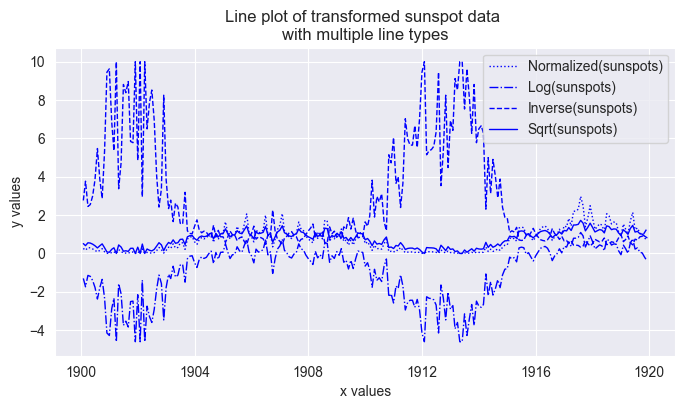

In [27]:
styles = [':','-.','--','-']
#lables = ['Normalized','log(x)','1/x','sqrt(x)']

fig = plt.figure(figsize=(8, 4)) # define plot area
ax = fig.gca() # define axis   
temp = df[(df['Date'] > '1900-01-01') & (df['Date'] <= '1919-12-01')]
for col, style in zip(temp[['Normalized','Log','Inverse','Sqrt']], styles):    
    ax.plot(temp.Date, temp[col], linestyle = style, color = 'b', label=(col+'(sunspots)'), linewidth=1)
ax.set_title('Line plot of transformed sunspot data \nwith multiple line types') # Give the plot a main title
ax.set_xlabel('x values') # Set text for the x axis
ax.set_ylabel('y values')# Set text for y axis    
ax.legend()

Examine the plot above and notice that with just 4 types, the lines on the plot are distinct. This is event the case for the normalize sunspots and the square root of the normalized sunspots, which run quite close together. Adding too many line types to a plot such as the above will cause perception problems for the viewer. 

In principle, a combination of color and line type can be used to make lines distinct. However, this method must be used cautiously. The result can easily be *line spaghetti* which is difficult to understand, at best.  

### Qualitative Color Palettes

Qualitative (or categorical) color palettes are often used to visualize categorical data. If the number of categories are few and the colors chosen are distinctive, this method can be effective. However, for more than a few categories, or if the choice of color is poor, this method is not effective. The result is often a confusing array or symbols with hard to distinguish colors, which will confound the understanding of the viewer. 

As an example where a qualitative palette works well consider the scatter plot shown below. There are only two categories and the colors are quite distinctive. 

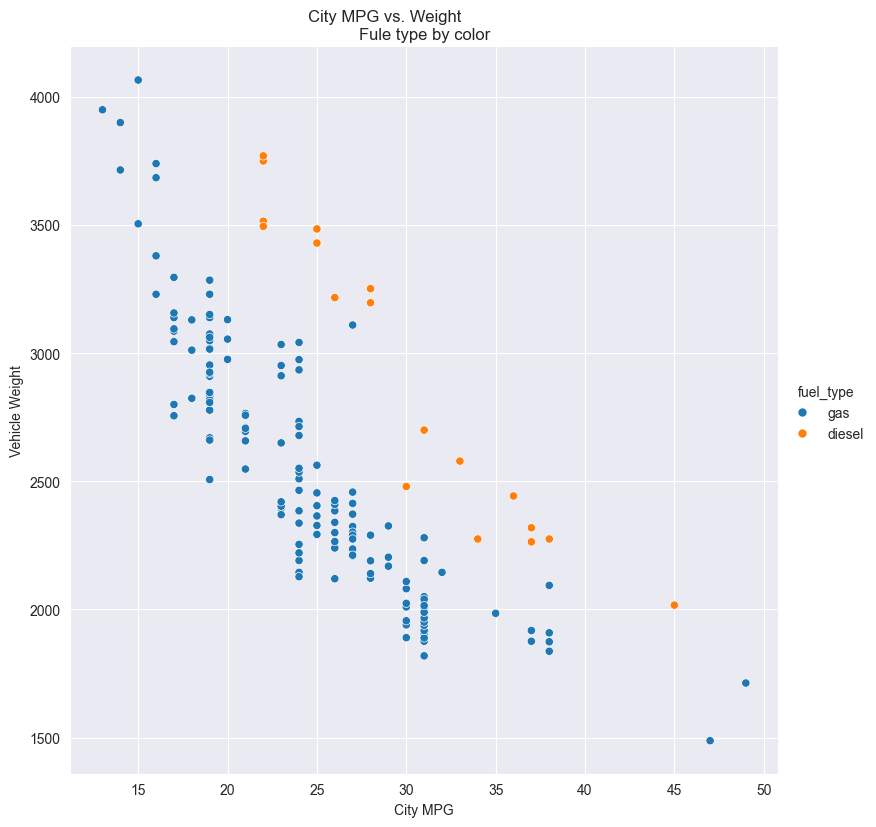

In [28]:
ax = sns.relplot(x = 'city_mpg', y = 'curb_weight', 
                 hue = 'fuel_type', 
                 data=auto_prices,
                 height = 8, aspect=1/1)
ax.set(title ='City MPG vs. Weight  \
               \nFule type by color', # Give the plot a main title
       xlabel = 'City MPG', # Set text for the x axis
       ylabel = 'Vehicle Weight') # Set text for y axis    

We can easily see the distinctive relationships for both gas and diesel fueled cars. Using a few categorical colors from a well chosen pallet can be quite effective. 

But, what happens if there are a larger number of categories. To find out, execute the code in the cell below which displays the make of the auto by categorical color. 

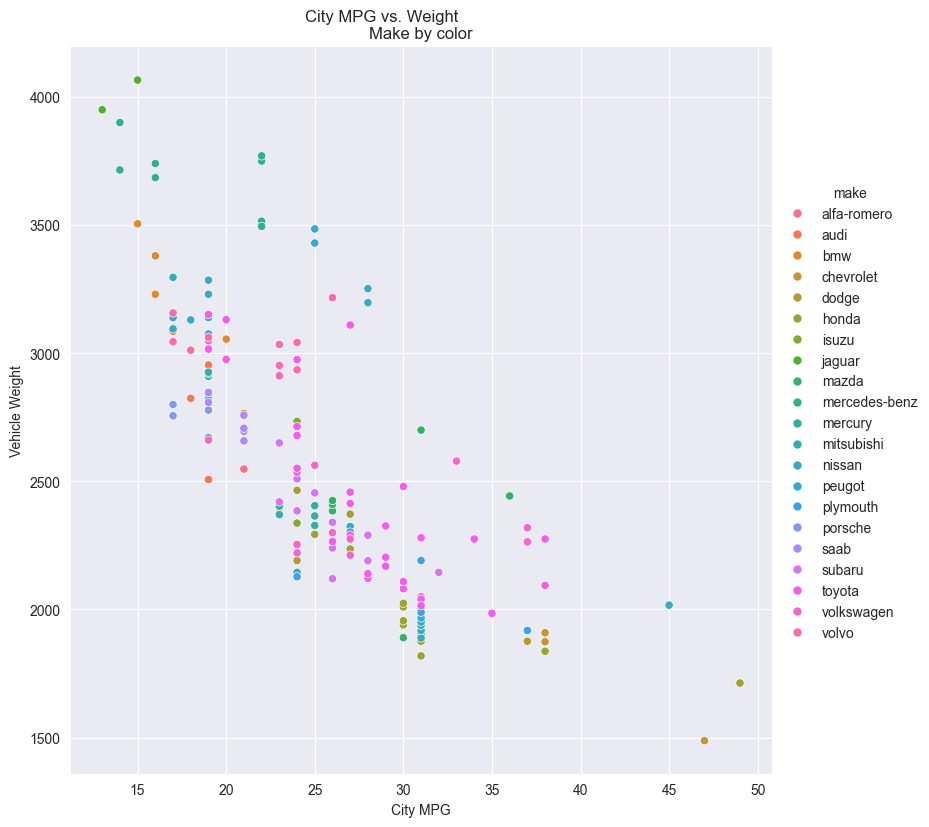

In [29]:
ax = sns.relplot(x = 'city_mpg', y = 'curb_weight', 
                 hue = 'make', 
                 data=auto_prices,
                 height = 8, aspect=1/1)
ax.set(title ='City MPG vs. Weight  \
               \nMake by color', # Give the plot a main title
       xlabel = 'City MPG', # Set text for the x axis
       ylabel = 'Vehicle Weight') # Set text for y axis       

### Marker Shape

Marker shape is another commonly used plot aesthetic for displaying categorical relationships. As with qualitative color palettes, this aesthetic is only useful when two conditions are met:
1. The number of categories is small.
2. Distinctive shape are chosen for the markers.

The code in the cell below uses the relplot method from the Seaborn package to plot a aspiration as a marker type. Execute this code and examine the results. 

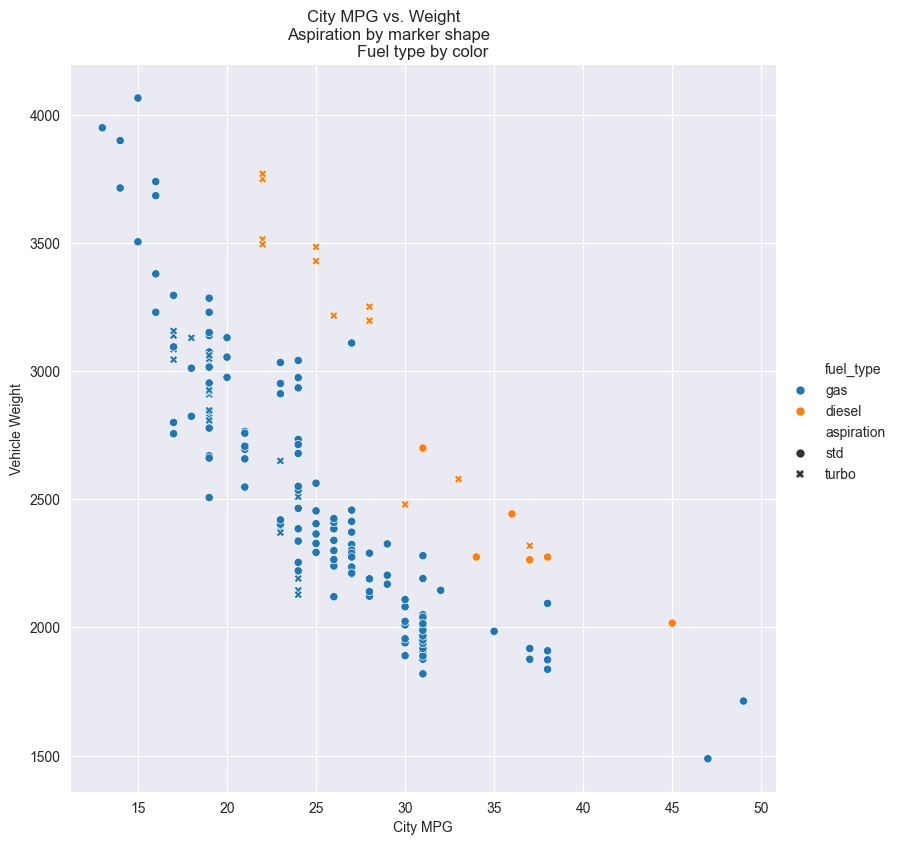

In [30]:
ax = sns.relplot(x = 'city_mpg', y = 'curb_weight', 
                 style = 'aspiration', 
                 hue = 'fuel_type',
                 data=auto_prices,
                 height = 8, aspect=1/1)
ax.set(title ='City MPG vs. Weight  \
               \nAspiration by marker shape\
               \nFuel type by color', # Give the plot a main title
       xlabel = 'City MPG', # Set text for the x axis
       ylabel = 'Vehicle Weight') # Set text for y axis       

The resulting plot above takes a bit of study to see any useful relationship. Several relationships can be noticed:
1. For the gas cars, it is clear that for the most part, only cars in the middle of the weight and fuel economy range have turbo aspiration. 
2. Most diesel cars have turbo aspiration. 

It is clear that without the color coding of the fuel type these interpretations could not be found. This illustrates a key aspect of visualization for complex data. Very often **multiple plot attributes are needed to understand relationships**. 

To see an example of a plot with too many categories, execute the code in the cell below which uses marker type to display engine type. 

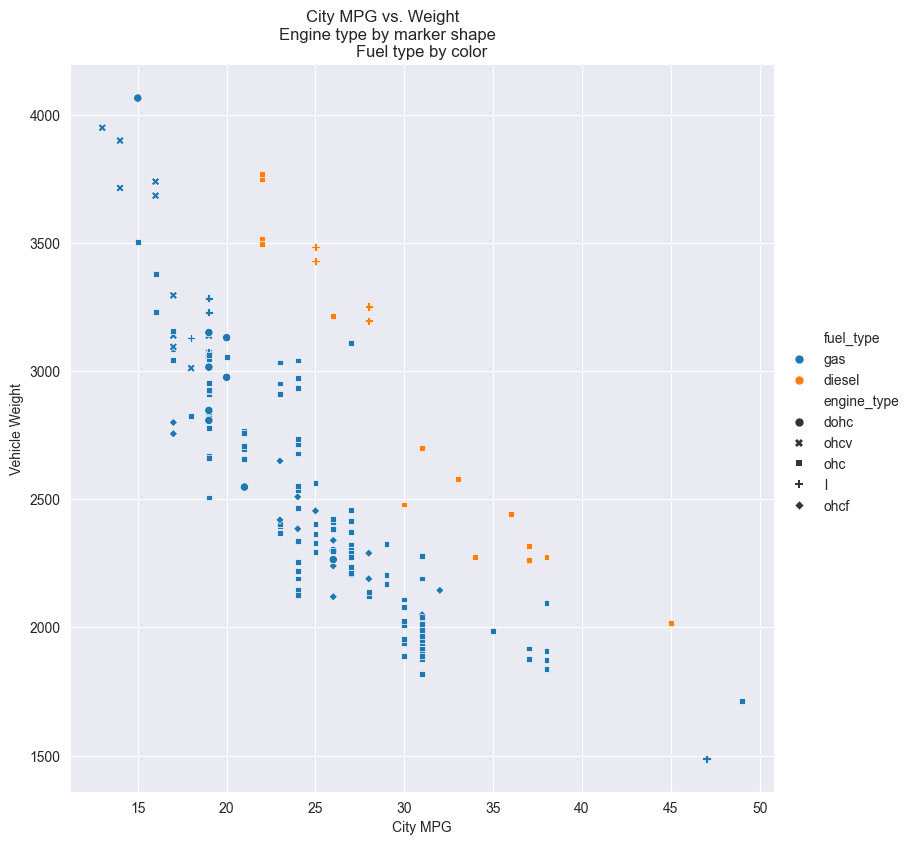

In [31]:
ax = sns.relplot(x = 'city_mpg', y = 'curb_weight', 
                 style = 'engine_type',
                 hue = 'fuel_type',
                 data=auto_prices,
                 height = 8, aspect=1/1)
ax.set(title ='City MPG vs. Weight  \
               \nEngine type by marker shape\
               \nFuel type by color', # Give the plot a main title
       xlabel = 'City MPG', # Set text for the x axis
       ylabel = 'Vehicle Weight') # Set text for y axis     

It is nearly impossible to understand the relationship between the markers in the plot above. 

## Side by Side and Facet Plots

We have explored some basic plot aesthetics and attributes to effectively project key relationships of complex data. Now we will investigate the use of multiple plot axes to highlight relationships in complex datasets. The key idea is that often it is better to have a series of simpler plots showing different projections or subsets of a dataset than a single complex and hard to perceive chart. Complex charts with many colors, markers, line times, etc. displaying a large number of data values can be confusing at best and imperceptible at worse.   

There are many possibilities for showing subsets or projections of complex datasets. We will look at three of these. All of these methods use axes with the same scale. Using the same scale is important to ensure correct perception of the relationships in the data.  
1. Side by side plots of subsets of the the data can be used to show relationships between subsets of a complex dataset. Specifically, we will use side-by-side **violin plots** to examine differences in the empirical distribution of subsets of the data sets 
2. **Pairwise scatter plots** allow you to display a matrix of all pairwise combinations of variables. Other relationships and plot aesthetics can be added to these plots. 
3. A technique known as **faceting**. Faceting involves using values of categorical or numeric variables to create a systematic grid of related plots. Faceting goes by several other monikers, including **conditional plotting**, the **method of small multiples** or **lattice plotting**. 



### Violin plots

Now, we will use Seaborn to create a violin plot. A violin plot uses a kernel density estimation plot around a vertical line. The violin plots can be stacked, with a group by operation. This layout allows the viewer to make comparisons between the subsets of the dataset.

Execute the code in the cell below and examine the results.

Text(0, 0.5, 'Price')

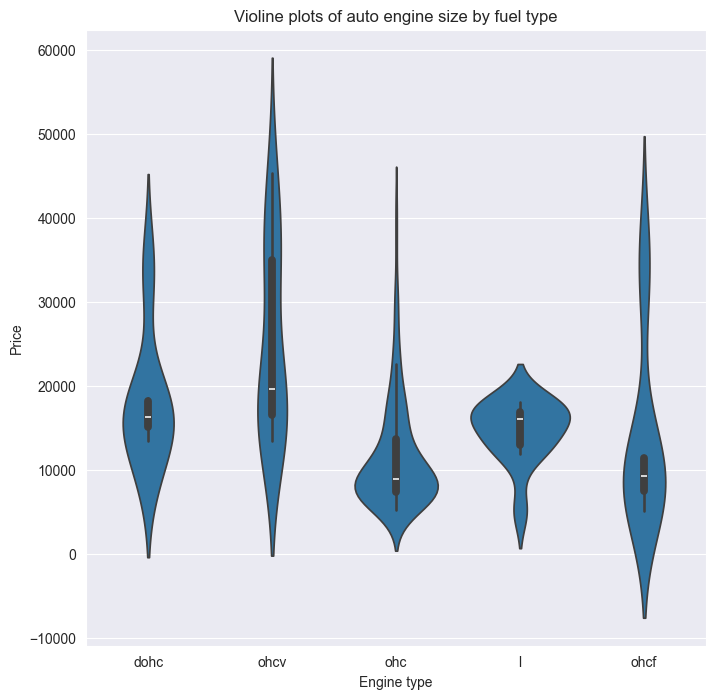

In [32]:
fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'engine_type', y = 'price', data = auto_prices, ax = ax)
ax.set_title('Violine plots of auto engine size by fuel type') # Give the plot a main title
ax.set_xlabel('Engine type') # Set text for the x axis
ax.set_ylabel('Price')# Set text for y axis

Using this plot you can compare the distribution of price of the autos subset by the auto engine type. 

### Pair wise plots

Pair wise plots, also know as plot matrices, allow viewing of multiple dimensions of a data set on one plot. A scatter plot is shown of each variable versus all other variables, arranged in an array. Another type of plot, such as a KDE plot, can be shown for each pair of variables. Other plot types can be placed along the diagonal of the array. 

Code to create a pair wise scatter plot for certain variables in the auto price data set is shown in the cell below. The recipe is:

- Define a list of the columns we wish to display.
- Use the Seaborn ``pairplot`` method to display the pairwise scatter plots of the subset of the pandas data frame or numpy array. The ``map_upper`` method is used to add KDE plots to the upper part of the plot array. 
- An argument to ``pairplot`` defines a color palette.
- An argument to ``pairplot`` defines KDE plots be placed along the diagonal of the array. 

Execute this code to display the pair wise plot array.

/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.


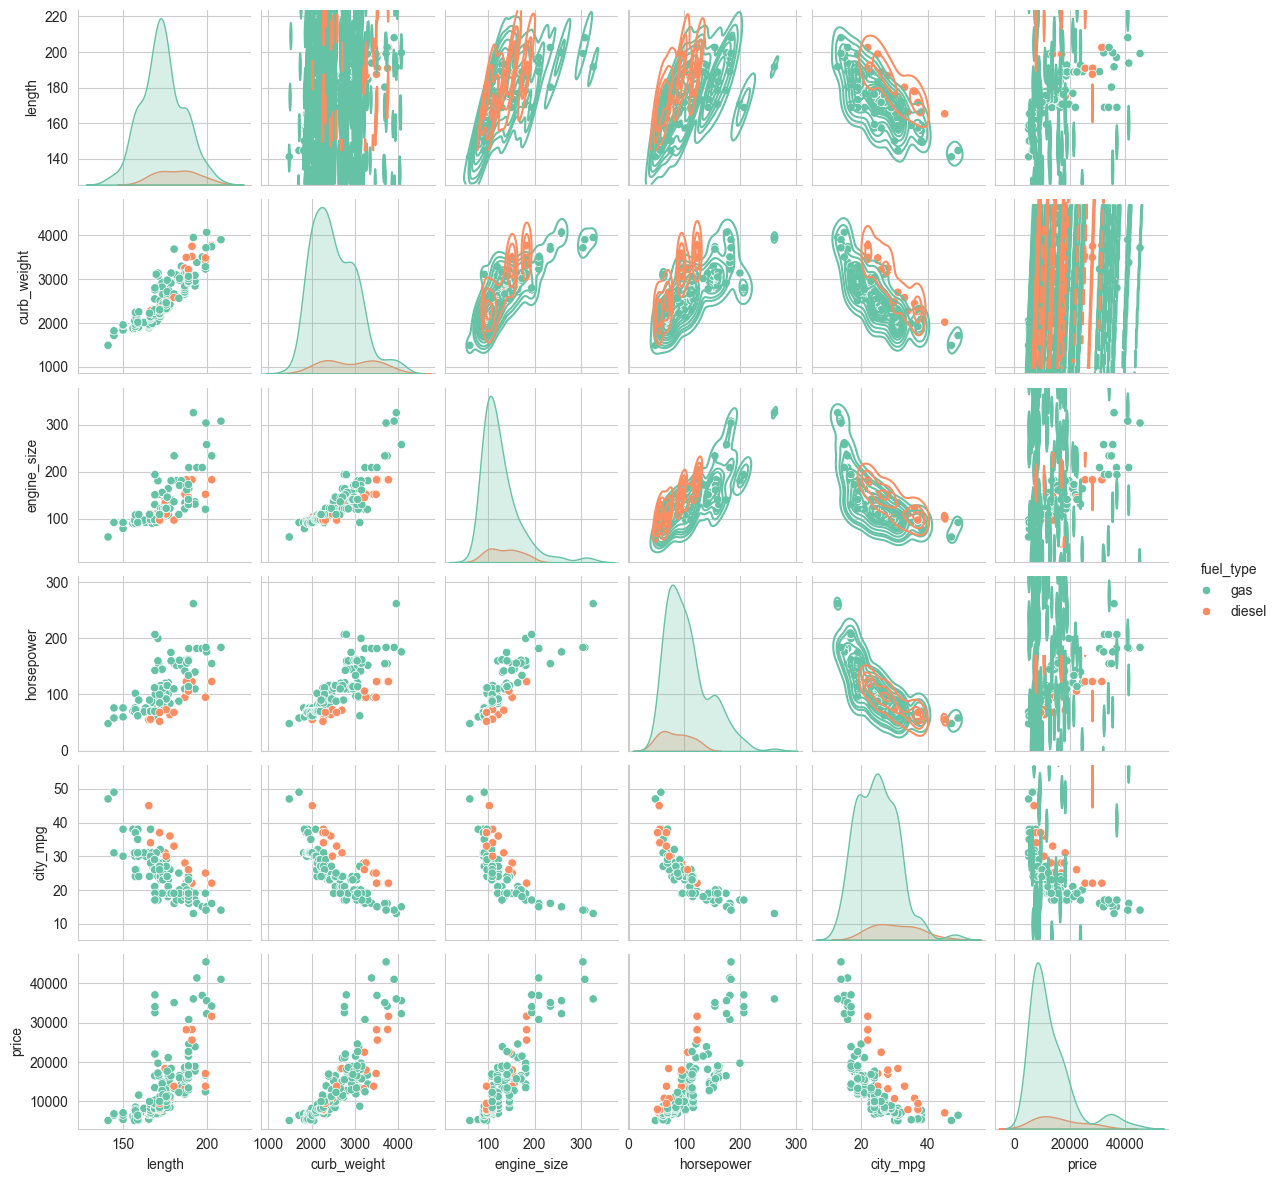

In [33]:
num_cols = ["length", "curb_weight", "engine_size", "horsepower", "city_mpg", "price", "fuel_type"] 
sns.pairplot(auto_prices[num_cols], hue='fuel_type', palette="Set2", diag_kind="kde", size=2).map_upper(sns.kdeplot, cmap="Blues_d")

There is a great deal of information on the above plot. Examine this plot, noticing at least the following:

- There are KDE plots grouped by fuel type for each of the variables specified. 
- Autos with larger length, curb weight, engine size, and horse power are more expensive.
- Cars with higher curb weights tend to be longer and have larger engines. 
- Longer, heavier cars, have larger engines, or more horsepower and are less fuel efficient.  

Notice, that the understanding a pairwise set of plots can be difficult. With too many variables, interpretation may become infeasible. 

### Facet plots

In the previous example, we created an array of plots by explicitly defining the axes or subplots. The Seaborn package allows us to create the same time of faceted plots with much less code, but with a bit less control. The code in the cell below does just this, following this recipe:

- A ``FacetGrid`` is defined for the data set. In this case we have only one facet (group by variable), across columns and one facet across the rows. 
- The ``map`` method is applied to the facet grid with a plot type specified.
- In this case, the plot type uses the ``regplot`` method to create a scatter plot. 

Execute the code in the cell below and examine the result.

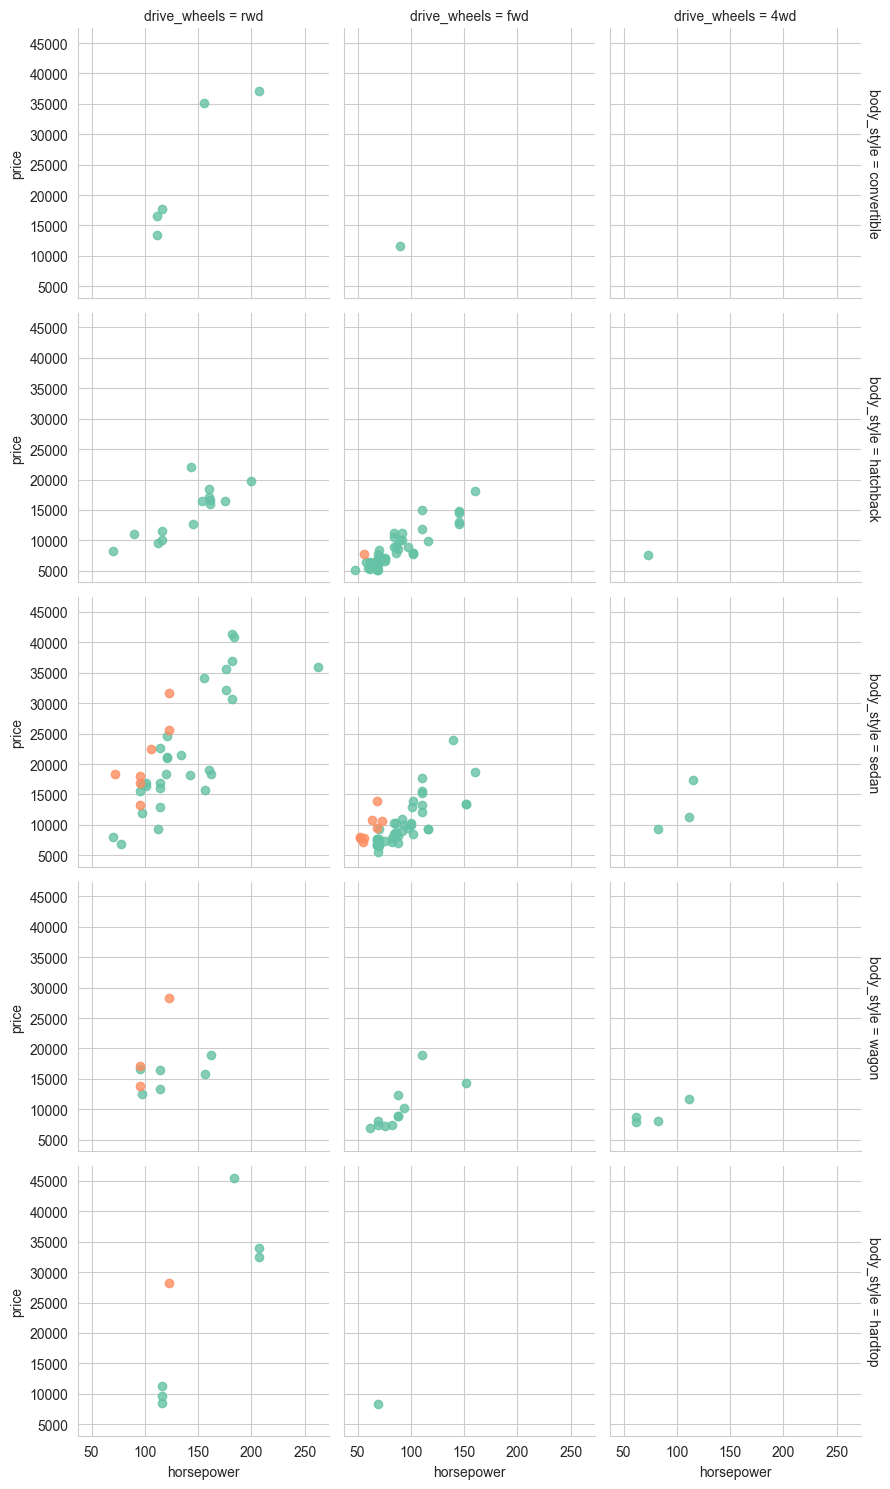

In [34]:
g = sns.FacetGrid(auto_prices, col="drive_wheels", 
                  row = 'body_style', hue = 'fuel_type',  
                  palette="Set2", margin_titles=True)
g.map(sns.regplot, 'horsepower', 'price', fit_reg = False)

Notice that we are now projecting 5 dimensions of our data onto the 2-d plotting surface. With the small number of data samples it is difficult to make specific observations. But you can notice a few significant differences between these subsets of the dataset.  

Consider that with a dataset with a much larger number of data samples these subsets will be much easier to understand. Further, the plots will be far less cluttered with only subsets of the data in the subplots.  

>**Your turn:** Try some other facet plots. As a first example, make scatter plots using other facet variables like fuel_type and aspiration. Or, as another example, make violin plots of price by fuel_type using drive_wheels of body_style as a facet variable. Note that some of these facet groups will not have any data. 

## Summary

We have covered a lot of ground in this tutorial. We have learned quite a bit about the relationships in the auto price data set by creating multiple views to visualize these data. 

Specifically, in this tutorial we have:

- Examined the use of plot aesthetics and attributes with good for human perception characteristics.
- Investigated how plot aesthetics which have poor perception qualities can be effectively used if used cautiously. 
- How plot arrays for subsets of data can be used to provide multiple views for complex data sets. 

Finally, **have fun exploring your data!**

#### Copyright 2019, Stephen F Elston. All rights reserved.